In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
import plotly.graph_objs as plotly  # for interactive plots
from sklearn.model_selection import train_test_split
import tensorflow as tf

# others
import re
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# others
import re
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import losses

In [4]:
import string, re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras.utils import text_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, TextVectorization, GlobalAveragePooling1D

Data Ingestion

In [5]:
#Load the datasets

reviews_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      60000 non-null  int64 
 1   Review  60000 non-null  object
 2   Rating  60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [7]:
reviews_df.head()

,Id,Review,Rating
0,0,Very good value and a great tv very happy and ...,5
1,1,After 6 month still can't access my account,3
2,2,I couldn't make an official review on a produc...,1
3,3,"Fantastic! Extremely easy to use website, fant...",5
4,4,So far annoyed as hell with this bt monthly pa...,1


In [8]:
reviews_df['Rating'].unique()

array([5, 3, 1, 4, 2])

In [ ]:
reviews_df.shape

(60000, 3)

In [ ]:
def sentiment_class(x):
  if x in (1,2):
    return 'negative'
  elif x == 3:
    return 'neutral'
  else:
    return 'positive'

reviews_df['Sentiment'] = reviews_df['Rating'].apply(sentiment_class)
reviews_df['Sentiment'].value_counts()

,count
Sentiment,
positive,38029
negative,20292
neutral,1679


In [ ]:
#drop review if sentiment is netural
reviews_df = reviews_df[reviews_df['Sentiment']!= 'neutral']
#reviews_df = reviews_df[~reviews_df.Rating== 3]
#reviews_df = reviews_df[~reviews_df.Sentiment.eq('neutral')]
reviews_df.head()

,Id,Review,Rating,Sentiment
0,0,Very good value and a great tv very happy and ...,5,positive
2,2,I couldn't make an official review on a produc...,1,negative
3,3,"Fantastic! Extremely easy to use website, fant...",5,positive
4,4,So far annoyed as hell with this bt monthly pa...,1,negative
5,5,Correct replacement delivered on time now my v...,5,positive


In [ ]:
reviews_df['Sentiment'].unique()
reviews_df['Rating'].unique()

array([5, 1, 4, 2])

In [ ]:
# reviews_df['Review_Length'] = reviews_df['Review'].apply(lambda x: len(x.split()))
# pos_review_length_avg = reviews_df[reviews_df['Sentiment']== 'positive']['Review_Length'].mean()
# neg_review_length_avg = reviews_df[reviews_df['Sentiment']== 'negative']['Review_Length'].mean()
# print('Average positive review length: ', pos_review_length_avg)
# print('Average negative review length: ', neg_review_length_avg)

Average positive review length:  28.10420994504194
Average negative review length:  109.10072935146856


In [ ]:
# label encoder for y feature
# # drop review if sentiment is netural
# df = df_init[~df_init.sentiment.eq('neutral')]

# # rename sentiment to positive = 1, negative = 0
# df['sentiment'] = np.where(df.sentiment.eq('positive'), 1, 0)

In [ ]:
reviews_df.head()
print('reviews_df shape: ', reviews_df.shape)

reviews_df shape:  (58321, 4)


In [ ]:
reviews_df = reviews_df.reset_index()
reviews_df

,index,Id,Review,Rating,Sentiment
0,0,0,Very good value and a great tv very happy and ...,5,positive
1,2,2,I couldn't make an official review on a produc...,1,negative
2,3,3,"Fantastic! Extremely easy to use website, fant...",5,positive
3,4,4,So far annoyed as hell with this bt monthly pa...,1,negative
4,5,5,Correct replacement delivered on time now my v...,5,positive
...,...,...,...,...,...
58316,59995,59995,"Response was very quick, engineer arrived when...",5,positive
58317,59996,59996,"I'm trying my best to leave TalkTalk, unfortun...",1,negative
58318,59997,59997,Just what do we get for paying this money for ...,1,negative
58319,59998,59998,Could not make our mind on which TV to purchas...,5,positive


In [ ]:
# Apply random shuffling to dataset before splitting the data
np.random.seed(0)
indices = np.arange(reviews_df.shape[0])
shuffled_indices = np.random.permutation(indices)
reviews_df = reviews_df.reindex(shuffled_indices)

X = reviews_df[['Review', 'Rating']]
y = reviews_df['Sentiment']

In [ ]:
#Create data training and testing splits
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1234)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1234)

In [ ]:
y_train.head()
X_train.head()

,Review,Rating
16051,I ordered a TV for my sons Christmas present w...,1
53063,"From the beginning when I ordered, everything ...",5
9363,We were moved to Shell when our previous energ...,5
24346,Service was excellent and the tv was a great p...,5
33871,"Ordered a product, wrong item was sent, never ...",1


Exploratory Data Analysis

In [ ]:
#display few examples of each type of rating and sentiment class
#X_train = X_train['Review']
for i in range(5):
  print('training example data:', X_train.iloc[i])
  print('training example label:', y_train.iloc[i])


#sentiment classification vs rating bar graph --> balanced dataset

#number of tokens in each review - descriptive statistics including average
#length of review and average for each sentiment classification

training example data: Review    I ordered a TV for my sons Christmas present w...
Rating                                                    1
Name: 16051, dtype: object
training example label: negative
training example data: Review    From the beginning when I ordered, everything ...
Rating                                                    5
Name: 53063, dtype: object
training example label: positive
training example data: Review    We were moved to Shell when our previous energ...
Rating                                                    5
Name: 9363, dtype: object
training example label: positive
training example data: Review    Service was excellent and the tv was a great p...
Rating                                                    5
Name: 24346, dtype: object
training example label: positive
training example data: Review    Ordered a product, wrong item was sent, never ...
Rating                                                    1
Name: 33871, dtype: object
training example la

In [ ]:
X_train['Rating'].value_counts()

,count
Rating,
5,20808
1,11194
4,2001
2,989


,count
Rating,
2,989
4,2001
1,11194
5,20808


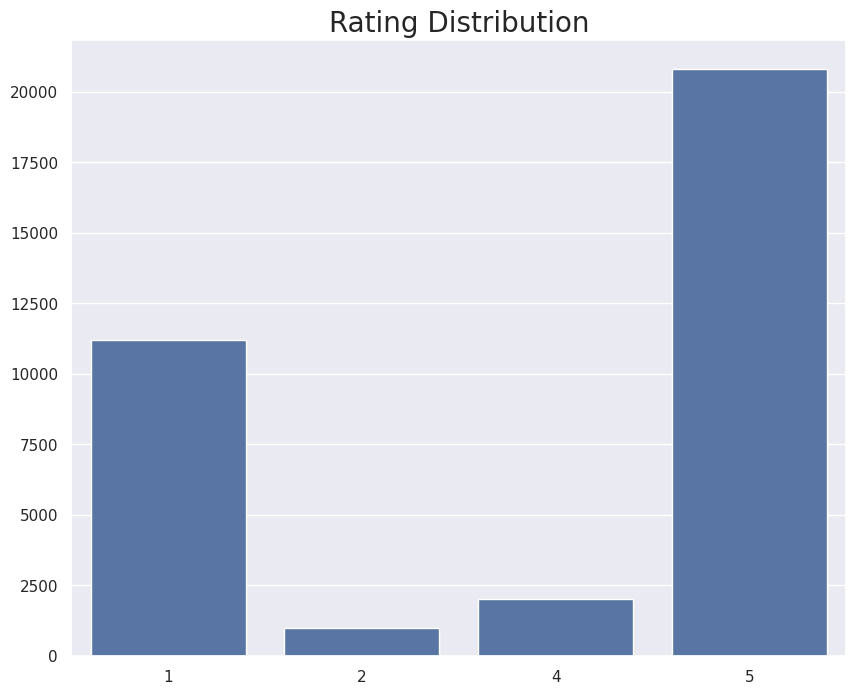

In [ ]:
# View Train Rating Distribution
plt.figure(figsize=(10, 8))
plt.title('Rating Distribution', fontsize=20)

rating_distribution = X_train['Rating'].value_counts().sort_values()
sns.barplot(x=list(rating_distribution.keys()),
            y=rating_distribution.values)
display(rating_distribution.sort_values())

,count
Sentiment,
negative,12183
positive,22809


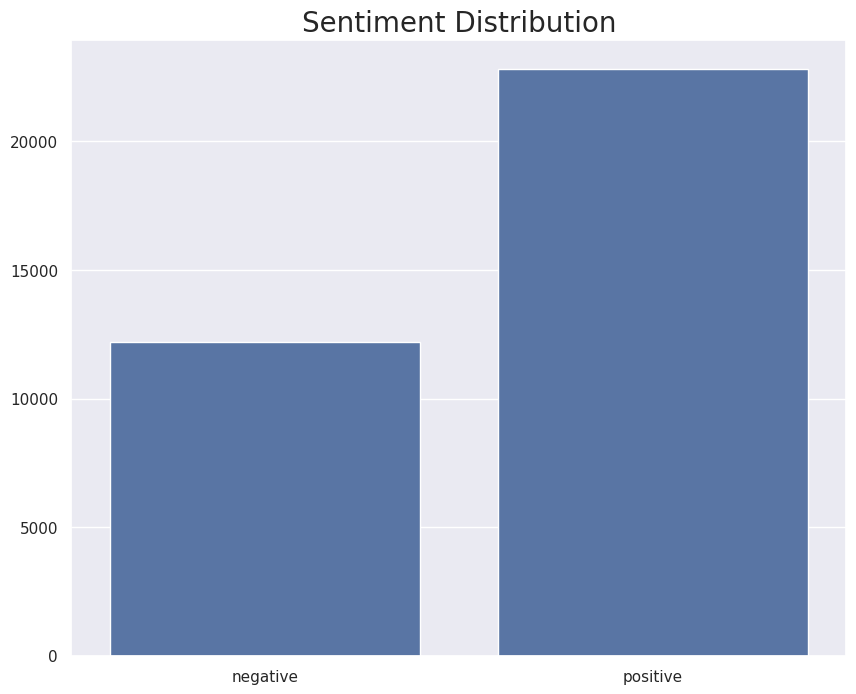

In [ ]:
# View Train Sentiment Distribution
plt.figure(figsize=(10, 8))
plt.title('Sentiment Distribution', fontsize=20)

sentiment_distribution = y_train.value_counts().sort_values()
sns.barplot(x=list(sentiment_distribution.keys()),
            y=sentiment_distribution.values)
display(sentiment_distribution.sort_values())

In [ ]:
# randomly draw 46000 examples from each class
df_balanced = pd.concat(
    [X_train, y_train],
    axis=1)


temp_positive = df_balanced[df_balanced.Sentiment == 'positive'].sample(
    n=12000,
    replace=False
)

temp_negative = df_balanced[df_balanced.Sentiment == 'negative'].sample(
    n=12000,
    replace=False
)

df_balanced = pd.concat(
    [temp_positive, temp_negative],
    axis=0)

# shuffle df_balanced
df_balanced = df_balanced.sample(frac=1) # frac=1 retains all the data
df_balanced.reset_index(drop=True, inplace=True) # reset index

print('After preprocessing, our data contains', df_balanced.shape[0], 'reviews.')

After preprocessing, our data contains 24000 reviews.


In [ ]:
df_balanced['Review_Length'] = df_balanced['Review'].apply(lambda x: len(x.split()))
pos_review_length_avg = df_balanced[df_balanced['Sentiment']== 'positive']['Review_Length'].mean()
neg_review_length_avg = df_balanced[df_balanced['Sentiment']== 'negative']['Review_Length'].mean()
print('Average positive review length: ', pos_review_length_avg)
print('Average negative review length: ', neg_review_length_avg)

Average positive review length:  28.017583333333334
Average negative review length:  109.60616666666667


In [ ]:
#Distribution of Distinct Words in a Review for Positive vs Negative Reviews
df_balanced['Distinct_Words'] = df_balanced['Review'].apply(lambda x:len(np.unique(x.lower().split())))
df_balanced

,Review,Rating,Sentiment,Review_Length,Distinct_Words
0,"They are bad company, charging £225.00 per mon...",1,negative,171,125
1,I ordered a new router from BT.(hub2). The eng...,1,negative,145,86
2,"It’s been great and more than satisfying, reco...",5,positive,23,21
3,Had broadband for a year all seemed fine\nHave...,1,negative,55,46
4,"Excellent communication, top notch product. Co...",5,positive,11,11
...,...,...,...,...,...
23995,Great price and product. Computer runs so much...,5,positive,10,10
23996,Absolutely terrible. Please don't even go into...,1,negative,109,80
23997,I used a voucher code from Unidays which I tho...,1,negative,276,159
23998,"Really good service, the Phone arrived very qu...",5,positive,18,18


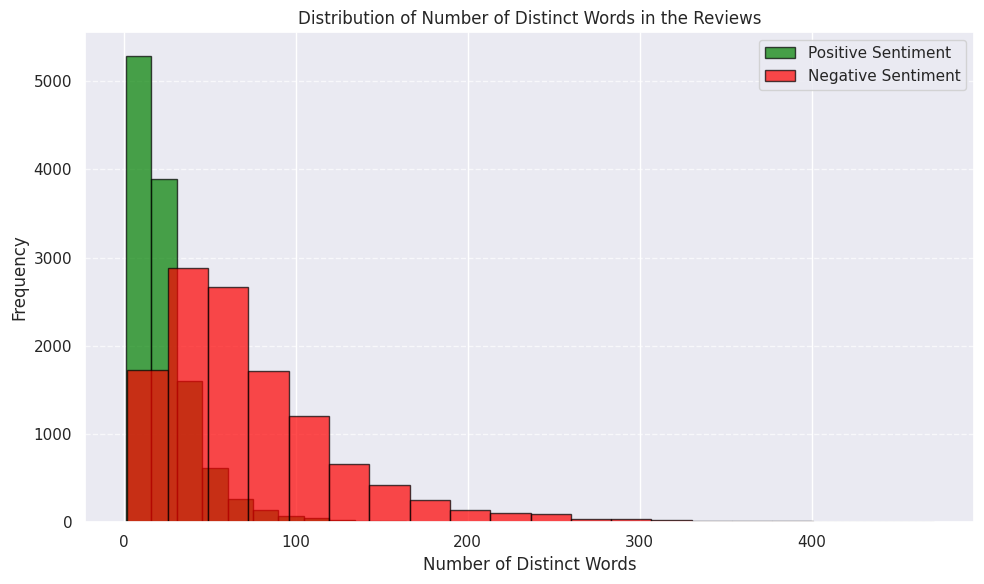

In [ ]:
# Separate data based on sentiment
positive = df_balanced[df_balanced['Sentiment'] == 'positive']['Distinct_Words']
negative = df_balanced[df_balanced['Sentiment'] == 'negative']['Distinct_Words']

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.hist(positive, bins=20, alpha=0.7, label='Positive Sentiment', color='green', edgecolor='black')
plt.hist(negative, bins=20, alpha=0.7, label='Negative Sentiment', color='red', edgecolor='black')

# Add plot details
plt.title('Distribution of Number of Distinct Words in the Reviews')
plt.xlabel('Number of Distinct Words')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df_balanced

,Review,Rating,Sentiment
0,"They are bad company, charging £225.00 per mon...",1,negative
1,I ordered a new router from BT.(hub2). The eng...,1,negative
2,"It’s been great and more than satisfying, reco...",5,positive
3,Had broadband for a year all seemed fine\nHave...,1,negative
4,"Excellent communication, top notch product. Co...",5,positive
...,...,...,...
23995,Great price and product. Computer runs so much...,5,positive
23996,Absolutely terrible. Please don't even go into...,1,negative
23997,I used a voucher code from Unidays which I tho...,1,negative
23998,"Really good service, the Phone arrived very qu...",5,positive


In [ ]:
X_train = df_balanced['Review']
y_train = df_balanced['Sentiment']
y_train = np.where(y_train.eq('positive'), 1, 0)

X_val = X_val['Review']
y_val = np.where(y_val.eq('positive'), 1, 0)

X_test = X_test['Review']
y_test = np.where(y_test.eq('positive'), 1, 0)

In [ ]:
X_val, y_val

(19770    Virgin media transferred me to 02 at their ins...
 29950    All about the service not, when first installe...
 50382    Excellent engineer\nVery knowledgeable and hel...
 31989    For my parents' broadband: Biggest dog mess of...
 48321    I just bought 3 plugins from plugin boutique a...
                                ...                        
 7813     Always get great value, good quality photos at...
 32872    Absolutely shocking customer service. Been com...
 34753    Great communication - particularly with delive...
 34020    Not received my order and no response from ghd...
 22806    Good knowledge of products. Reliable and promp...
 Name: Review, Length: 11664, dtype: object,
 array([0, 0, 1, ..., 1, 0, 1]))

In [ ]:
type(y_test)

numpy.ndarray

Data Pre-Processing

In [ ]:
#text format lower case; remove stop words; stemmazation


In [ ]:
# remove HTML markup, punctuation, and other non-letter characters
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))

    # # removing english stopwords
    # stop_words = set(stopwords.words('english'))
    # for word in stop_words:
    #     tokens = tf.strings.regex_replace(tokens, f'{word}', "")

    return text

X_train

,Review
0,"They are bad company, charging £225.00 per mon..."
1,I ordered a new router from BT.(hub2). The eng...
2,"It’s been great and more than satisfying, reco..."
3,Had broadband for a year all seemed fine\nHave...
4,"Excellent communication, top notch product. Co..."
...,...
23995,Great price and product. Computer runs so much...
23996,Absolutely terrible. Please don't even go into...
23997,I used a voucher code from Unidays which I tho...
23998,"Really good service, the Phone arrived very qu..."


In [ ]:
X_train = X_train.apply(preprocessor)
X_val = X_val.apply(str).apply(preprocessor)
X_test = X_test.apply(str).apply(preprocessor)

X_train
X_test

,Review
20135,i ve not been connected after being told on 9t...
55996,great service and good prices thank you will u...
2804,price offered was reasonable used the drop off...
35926,do not order a phone from this company if anyo...
44414,always a smooth and simple transaction when sh...
...,...
4527,great condition of items fast dispatch and del...
29116,music magpie gave higher prices than their com...
56800,i was relieved and amazed that a complicated m...
49882,would give it zero if i could was owed a refun...


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
# 1) Vectorize  2) Embeddings (vs encoding)
#1. vectorize
max_sequence_length = 250
max_features = 10000
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features, # Maximum vocabulary size - None -> no cap
    standardize='lower_and_strip_punctuation', # Standarization to apply to text - None -> no standarization
    split="whitespace", # Values can be None (no splitting), "whitespace", or a Callable
    output_mode='int',  # Values can be "int", "multi_hot", "count" or "tf_idf"
    output_sequence_length=max_sequence_length, # Only valid in INT mode. If set, the output will have its time dimension padded or truncated to exactly output_sequence_length values
    )

train_text = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

#X_train_vectorized = vectorize_layer(train_ds)
#X_test_vectorized = vectorize_layer(X_test)
# display("--Vocabulary--")
# for i, token in enumerate(vectorize_layer.get_vocabulary()):
#   display('%d: %s' %(i, token))

# 0: ('') - Padding Token
# 1: ('[UNK]') - OOV Token

In [ ]:
## creating a classification model
embedding_dim = 16
vocab_size = 10000


text_embedding = Embedding(vocab_size, embedding_dim, name='embedding')
text_input = Sequential(
    [vectorize_layer, text_embedding], name='text_input'
)

classifier_head = Sequential(
    [GlobalAveragePooling1D(), Dense(16, activation='relu'), Dense(32, activation='relu'), Dense(16, activation='relu'), Dense(1, activation='sigmoid')],
    name = 'classifier_head'
)

model = Sequential([text_input, classifier_head])
model.summary()

ValueError: Sequential model 'text_input' has no defined input shape yet.

In [ ]:
def encode_labels(labels, label_depth=5):
    return tf.one_hot(labels, depth=label_depth).numpy()


In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

X_train_vectorized = train_ds.map(vectorize_text)
X_test_vectorized = test_ds.map(vectorize_text)

AUTOTUNE = tf.data.AUTOTUNE
X_train_vectorized = X_train_vectorized.cache().prefetch(buffer_size=AUTOTUNE)
X_val_vectorized = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
X_test_vectorized = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


X_train_vectorized

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
vocab_size = len(vectorize_layer.get_vocabulary())

# Input shape:  (batch_size, input_length)
# Output shape: (batch_size, input_length, output_dim)
embedding_layer = tf.keras.layers.Embedding(
    input_dim = vocab_size,  # size of feature vocabulary
    output_dim = 2,   # embedding dimension
    input_length = max_sequence_length  # number of inputs
    )

first_review_embed_rep = embedding_layer(X_train_vectorized[0])
display(first_review_embed_rep)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[-0.02573491, -0.02090577,  0.02760955],
       [ 0.04213164,  0.04439935,  0.04804237],
       [-0.02853284,  0.03458476,  0.03239236],
       [ 0.03366603,  0.01746393, -0.01636754],
       [-0.00628974,  0.00160491,  0.02556529],
       [ 0.04744558, -0.03424962, -0.00795485]], dtype=float32)>

Baseline Model

In [ ]:
#baseline model 1: majority classifier
class_counts = Y_train['cocoa_percent_cat'].value_counts()
majority_class_index = class_counts.idxmax()
print("Majority class: ", majority_class_index)
print("Class counts: ", class_counts)


#accuracy of baseline model
majority_clf_accuracy = class_counts.max()/len(Y_train)
print("baseline model Training Accuracy: ", majority_clf_accuracy)


# Function to compute Cross-Entropy Loss
def compute_log_loss(y_true, pred_prob):
    y_true_dense = tf.keras.utils.to_categorical(y_true)
    cross_entropy_values = - np.sum(y_true_dense * np.log(pred_prob), axis=1)
    loss = np.mean(cross_entropy_values)
    return loss

train_loss = compute_log_loss(Y_train,np.array([0.02,0.88,0.10]))
val_loss = compute_log_loss(Y_val, np.array([0.02,0.88,0.10]))
print("Training loss: ", train_loss)
print("Validation loss: ", val_loss)

In [ ]:
#Baseline Model 2- Logistic Regression with One-Hot Encodings (HW#9)
def build_onehot_model(average_over_positions=False):
  """Build a tf.keras model for one-hot data."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()

  if average_over_positions:
    # This layer averages over the first dimension of the input by default.
    model.add(tf.keras.layers.GlobalAveragePooling1D())
  else:
    # Concatenate.
    model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      activation="sigmoid"         # sigmoid activation for binary classification
  ))

  model.compile(loss='binary_crossentropy',   # this is a classification task
                optimizer='adam',             # fancy optimizer
                metrics=['accuracy'])

  return model

def plot_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.ylim(0,1)
  plt.legend()
  plt.show()


tf.random.set_seed(0)
model1 = build_onehot_model()

# Fit the model.
X_train_one_hot = tf.keras.utils.to_categorical(X_train_vectorized)
history1 = model1.fit(
  x = X_train_one_hot,  # one-hot training data
  y = y_train,          # corresponding binary labels
  epochs=5,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

model1.summary()
# Convert the return value into a DataFrame so we can see the train loss
# and binary accuracy after every epoch.
history1 = pd.DataFrame(history1.history)
plot_history(history1)

history1


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
X_train_vectorized

<tf.Tensor: shape=(22000, 6), dtype=int64, numpy=
array([[   2,  345,   18,   34,  107,    3],
       [  34,  485,   16,    2, 5847,    5],
       [ 927,   14,    2,   29,   16,  276],
       ...,
       [  41,    2, 1406,    8,  521,  301],
       [  34,  145,   21,    3,  101,   33],
       [  32,  246, 1313, 4025,   14,   22]])>

Model Improvements

In [ ]:
# Model 1: Multiclass Logistic Regression (HW#5)

# YOUR CODE HERE
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units= 3,        # output dim
      input_shape= [num_features,],  # input dim
      use_bias=True,               # use a bias (intercept) param
      activation='sigmoid',
      kernel_initializer=tf.ones_initializer(),  # initialize params to 1
      bias_initializer=tf.ones_initializer(),    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch GD
  optimizer = tf.keras.optimizers.SGD(learning_rate= learning_rate)

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile(loss='binary_crossentropy', optimizer=optimizer,
                metrics = ['accuracy'])

  return model

  tf.random.set_seed(0)
# 2. Build and compile model

# YOUR CODE HERE
model_tf = build_model(
        num_features= X_train.shape[1],
        learning_rate=0.0001
    )

# 3. Fit the model
# YOUR CODE HERE
model_tf_history = model_tf.fit(
      x = X_train,
      y = y_train,
      validation_data = (X_val, y_val),
      epochs=10,
      batch_size = 32,
      verbose=1) # silence the output


#Generate plot for loss values
# Plot training loss
plt.plot(range(1, len(model_tf_history.history['loss']) + 1),
         model_tf_history.history['loss'], color='black', label='training loss')

#Plot validation loss
plt.plot(range(1, len(model_tf_history.history['val_loss']) + 1),
         model_tf_history.history['val_loss'], color='red', label='validation loss')
plt.title("Training and Validation Loss for the Model")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

print('final train loss: %.3f' %model_tf_history.history['loss'][-1])
print('final val loss: %.3f' %model_tf_history.history['val_loss'][-1])

In [ ]:
# Model 2: Logistic Regression with Embeddings (HW#9)
def build_embeddings_model(average_over_positions=False,
                           vocab_size=1000,
                           sequence_length=20,
                           embedding_dim=2):
  """Build a tf.keras model using embeddings."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      input_length=sequence_length)
  )

  if average_over_positions:
    # This layer averages over the first dimension of the input by default.
    model.add(tf.keras.layers.GlobalAveragePooling1D())
  else:
    # Concatenate.
    model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(
      units=1,                     # output dim (for binary classification)
      activation='sigmoid'         # apply the sigmoid function!
  ))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

model2 = build_embeddings_model(average_over_positions=True,
                               vocab_size=1000,
                               sequence_length=20,
                               embedding_dim=2)
history2 = model2.fit(
  x = X_train_reduced,  # our sparse padded training data
  y = Y_train,          # corresponding binary labels
  epochs=5,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

model2.summary()

history2 = pd.DataFrame(history2.history)
plot_history(history2)

array([0, 1])

In [ ]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Model 3: Text Sentiment Classification
# https://colab.research.google.com/drive/12pxBkaDRZWrgSemaiuDg8186_0pBpF3H?usp=sharing#scrollTo=Mr0GP-cQ-llN

embedding_dim = 8
max_features = 10000
model = tf.keras.Sequential([
  layers.Embedding(max_features, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1, activation='sigmoid')])

model.summary()

model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])


epochs = 10
history = model.fit(
    train_ds,
    #validation_data=val_ds,
    epochs=epochs)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


ValueError: Input 0 of layer "global_average_pooling1d_2" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (8,)

In [ ]:
np.unique(y_train)

array([0, 1])

In [ ]:
#Model 4: Sequence modeling embeddings
# https://colab.research.google.com/drive/1Wqbsh-C7eXAzcwtpLWcy21Tbsr_TpW3U?usp=sharing#scrollTo=677b2920


In [ ]:
#Model 5: Text Classification with RNN and Keras (research Transformers/LSTM) model
# RNN: https://colab.research.google.com/drive/1enkaLmUYnVD6C-XyXxpzYZ0HErLoA3py?usp=sharing#scrollTo=uC25Lu1Yvuqy
# Transfomers: https://www.tensorflow.org/text/tutorials/transformer



In [ ]:
#Model 6: CNN (Week 10 notebook)

Hyperparameter Tuning